### About
- This notebook summarize the following datasets.
    - [NYU Depth Dataset V2](https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html)

In [51]:
import os
import numpy as np
from pathlib import Path
import re
from imageio import imread
from skimage import transform
import shutil
import matplotlib.pyplot as plt

%matplotlib inline

### Split samples
- 590 samples in total
    - 400 for training
    - 190 for validation

In [85]:
data_dir = Path('../../data/nyu_depth_v2_raw')
samples = os.listdir(data_dir)
print('Number of sampels: ', len(samples))

Number of sampels:  590


### Example room

In [10]:
sample = 'living_room_0044'
files = os.listdir(data_dir / sample)

pgms = [f for f in files if '.pgm' in f and 'd-' in f]
ppms = [f for f in files if '.ppm' in f and 'r-' in f]

print('number of pgms: ', len(pgms), 'number of ppms: ', len(ppms))

number of pgms:  445 number of ppms:  445


### Read .pgm images
- Reference
    - https://stackoverflow.com/questions/7368739/numpy-and-16-bit-pgm

In [11]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

### Depth image sample
- .pgm format
- filename with prefix d-

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


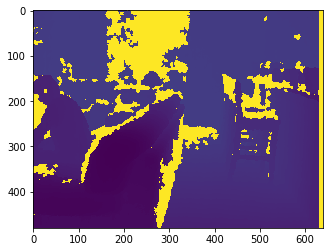

[[1010 1010 1010 ... 2047 2047 2047]
 [1010 1010 1010 ... 2047 2047 2047]
 [1010 1010 1010 ... 2047 2047 2047]
 ...
 [ 837  837  837 ... 2047 2047 2047]
 [ 837  837  837 ... 2047 2047 2047]
 [ 837  837  837 ... 2047 2047 2047]]
image shape resized:  (74, 55) image type:  <class 'numpy.ndarray'>


/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


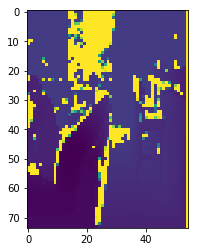

[[0.01543852 0.01551381 0.01554456 ... 0.01542687 0.01545296 0.03123522]
 [0.01546224 0.01551843 0.01557946 ... 0.01541856 0.01544213 0.03123522]
 [0.01548791 0.01553368 0.01557044 ... 0.01542687 0.01542756 0.03123522]
 ...
 [0.01279054 0.01281688 0.01282382 ... 0.01418465 0.01409864 0.03123522]
 [0.01278332 0.01279057 0.01282382 ... 0.0141777  0.0140988  0.03123522]
 [0.01278831 0.01283284 0.01283908 ... 0.01412754 0.01408338 0.03123522]]


In [57]:
for pgm in pgms[:1]:
    image = read_pgm(data_dir / sample / pgm, byteorder='<')
    print('image shape: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()
    
    print(image)
    
    image = transform.resize(image, (74, 55))
    print('image shape resized: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()
    
    print(image)

### RGB image sample
- .ppm format
- filename with prefix r-

image shape:  (480, 640, 3) image type:  <class 'numpy.ndarray'>


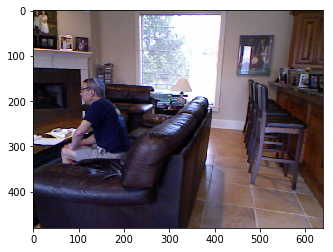

image shape resized:  (304, 228, 3) image type:  <class 'numpy.ndarray'>


/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


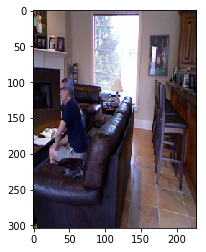

image shape resized:  (74, 55, 3) image type:  <class 'numpy.ndarray'>


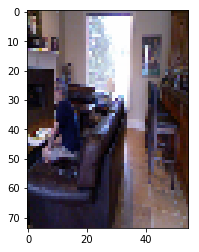

In [53]:
for ppm in ppms[:1]:
    image = imread(data_dir / sample / ppm)
    image = np.array(image)
    print('image shape: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()
    
    image = transform.resize(image, (304,  228))
    print('image shape resized: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()
    
    image = transform.resize(image, (74, 55))
    print('image shape resized: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()

### Split train/valid data

In [87]:
train_rgb = Path('./data/train/rgb')
train_depth = Path('./data/train/depth')

valid_rgb = Path('./data/valid/rgb')
valid_depth = Path('./data/valid/depth')

if os.path.exists(train_rgb) or os.path.exists(train_depth):
    shutil.rmtree(train_rgb)
    shutil.rmtree(train_depth)
os.makedirs(train_rgb)
os.makedirs(train_depth)

if os.path.exists(valid_rgb) or os.path.exists(valid_depth):
    shutil.rmtree(valid_rgb)
    shutil.rmtree(valid_depth)
os.makedirs(valid_rgb)
os.makedirs(valid_depth)

In [88]:
num_train = 400
idx = 1
for i, s in enumerate(samples):    
    
    rgb_samples = [f for f in os.listdir(data_dir / s) if '.ppm' in f and 'r-' in f]
    depth_samples = [f for f in os.listdir(data_dir / s) if '.pgm' in f and 'd-' in f]
    
    if not rgb_samples or not depth_samples:
        print('Empty folder: ', i, s)
        continue
    else:
        rgb_sample, depth_sample = rgb_samples[0], depth_samples[0]
    
    if i < num_train:
        shutil.copyfile(data_dir / s / rgb_sample, train_rgb / '{}.ppm'.format(idx))
        shutil.copyfile(data_dir / s / depth_sample, train_depth / '{}.pgm'.format(idx))
    else:
        shutil.copyfile(data_dir / s / rgb_sample, valid_rgb / '{}.ppm'.format(idx - num_train))
        shutil.copyfile(data_dir / s / depth_sample, valid_depth / '{}.pgm'.format(idx - num_train))
    
    idx += 1
    
print('finished')

Empty folder:  347 kitchen_0018a
Empty folder:  348 kitchen_0018b
Empty folder:  349 kitchen_0018c
Empty folder:  438 living_room_0023a
Empty folder:  439 living_room_0023b
Empty folder:  440 living_room_0024a
Empty folder:  441 living_room_0024b
Empty folder:  442 living_room_0024c
finished


image shape resized:  (74, 55) image type:  <class 'numpy.ndarray'>


/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


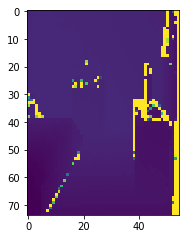

[[0.01532398 0.01538074 0.01539635 ... 0.0188053  0.03123522 0.03123522]
 [0.01532491 0.01539689 0.01542894 ... 0.01452529 0.03105915 0.03123522]
 [0.01535058 0.01541092 0.01544213 ... 0.01449607 0.01438856 0.03123522]
 ...
 [0.01350423 0.01356527 0.01361105 ... 0.03123522 0.03123522 0.03123522]
 [0.01350423 0.01355001 0.01361248 ... 0.03123522 0.03123522 0.03123522]
 [0.01348898 0.01356084 0.01361105 ... 0.03123522 0.03123522 0.03123522]]


In [71]:
data_dir = Path('./data/train')

image = read_pgm(data_dir / 'depth' / '91.pgm', byteorder='<')
image = transform.resize(image, (74, 55))
print('image shape resized: ', image.shape, 'image type: ', type(image))
plt.subplot(121)
plt.imshow(image)
plt.show()
print(image)

image shape resized:  (304, 228, 3) image type:  <class 'numpy.ndarray'>


/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dushu/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


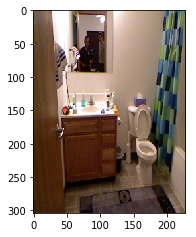

[[[0.45882353 0.38431373 0.26855865]
  [0.46146869 0.39945685 0.29793602]
  [0.48950537 0.38527963 0.31778466]
  ...
  [0.44956457 0.4516711  0.28531132]
  [0.5032372  0.45636576 0.3748194 ]
  [0.53184147 0.45844513 0.38039216]]

 [[0.4622291  0.38123676 0.27778955]
  [0.4464858  0.38596491 0.29990766]
  [0.47732243 0.38693625 0.31966668]
  ...
  [0.46513678 0.45704289 0.30798526]
  [0.51301396 0.46676987 0.36657433]
  [0.5461074  0.45844513 0.40423117]]

 [[0.46842105 0.38468669 0.29295349]
  [0.44983705 0.38659225 0.30792189]
  [0.47640179 0.39117285 0.31651277]
  ...
  [0.47318904 0.45336122 0.34643963]
  [0.512297   0.47565314 0.36449134]
  [0.53900386 0.4603688  0.43003096]]

 ...

 [[0.21785346 0.11628193 0.02349501]
  [0.2364456  0.11297865 0.02214709]
  [0.22380461 0.12444463 0.01968388]
  ...
  [0.43383575 0.35792914 0.29593993]
  [0.46611808 0.36320949 0.35459236]
  [0.57620625 0.5022224  0.43137255]]

 [[0.21517028 0.09623504 0.01416907]
  [0.23004182 0.10119222 0.05168106]


In [73]:
image = imread(data_dir / 'rgb' / '58.ppm')
image = transform.resize(image, (304, 228))
print('image shape resized: ', image.shape, 'image type: ', type(image))
plt.subplot(122)
plt.imshow(image)
plt.show()
print(image)